<a href="https://colab.research.google.com/github/harith489/hat-yolo-roboflow/blob/main/YOLOv8CustomObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Mon Oct  9 14:37:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 8.3 MB/s eta 0:00:00


# Install Yolov8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.0.1+cu118>=1.8.0
torchvision         ✅ 0.15.2+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


# Inference Example with Pretrained YOLOv8 Model

In [4]:
!yolo task=detect mode=predict model=yolov8n.pt conf=.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 6.23M/6.23M [00:00<00:00, 232MB/s]
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 93.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 84.5ms
Speed: 15.7ms preprocess, 84.5ms inference, 24.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


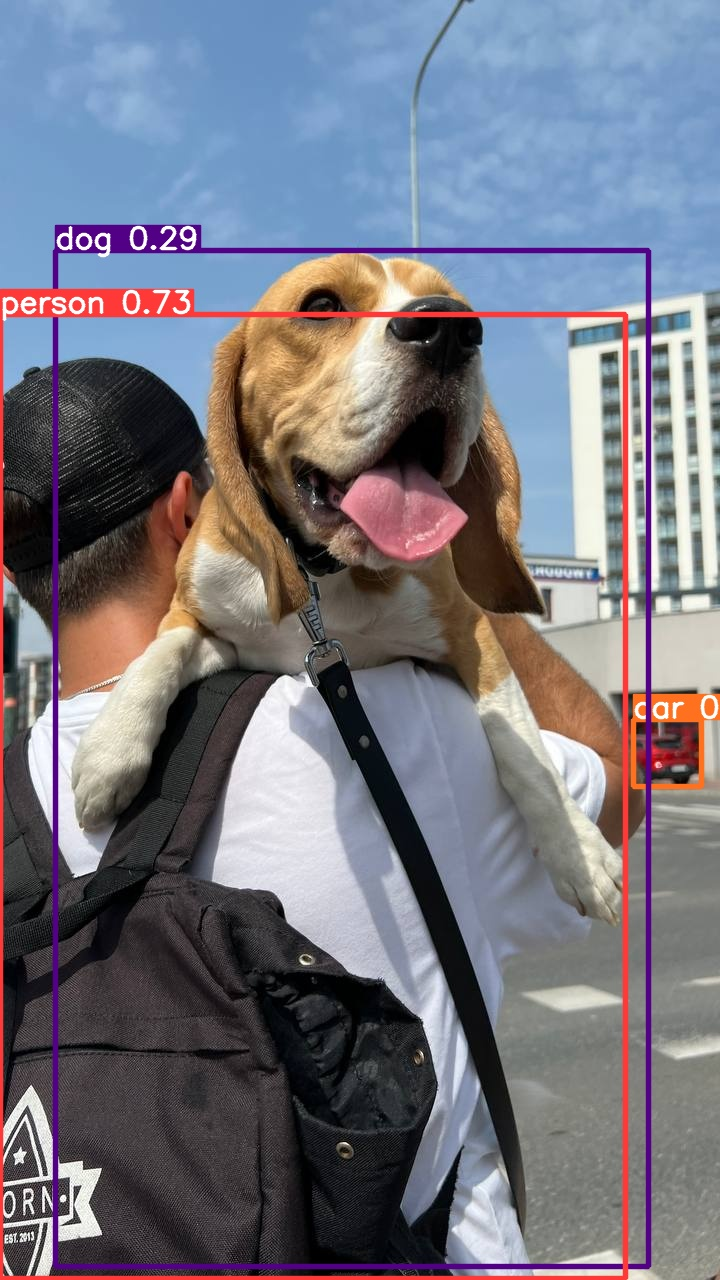

In [5]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Train YOLOv8 Model on Custom Dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OLALagwxGMqiwMp96fo7")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
dataset = project.version(14).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Hard-Hat-Workers-14 in yolov8:: 100%|██████████| 14082/14082 [00:02<00:00, 5978.97it/s]


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Hard-Hat-Workers-14/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

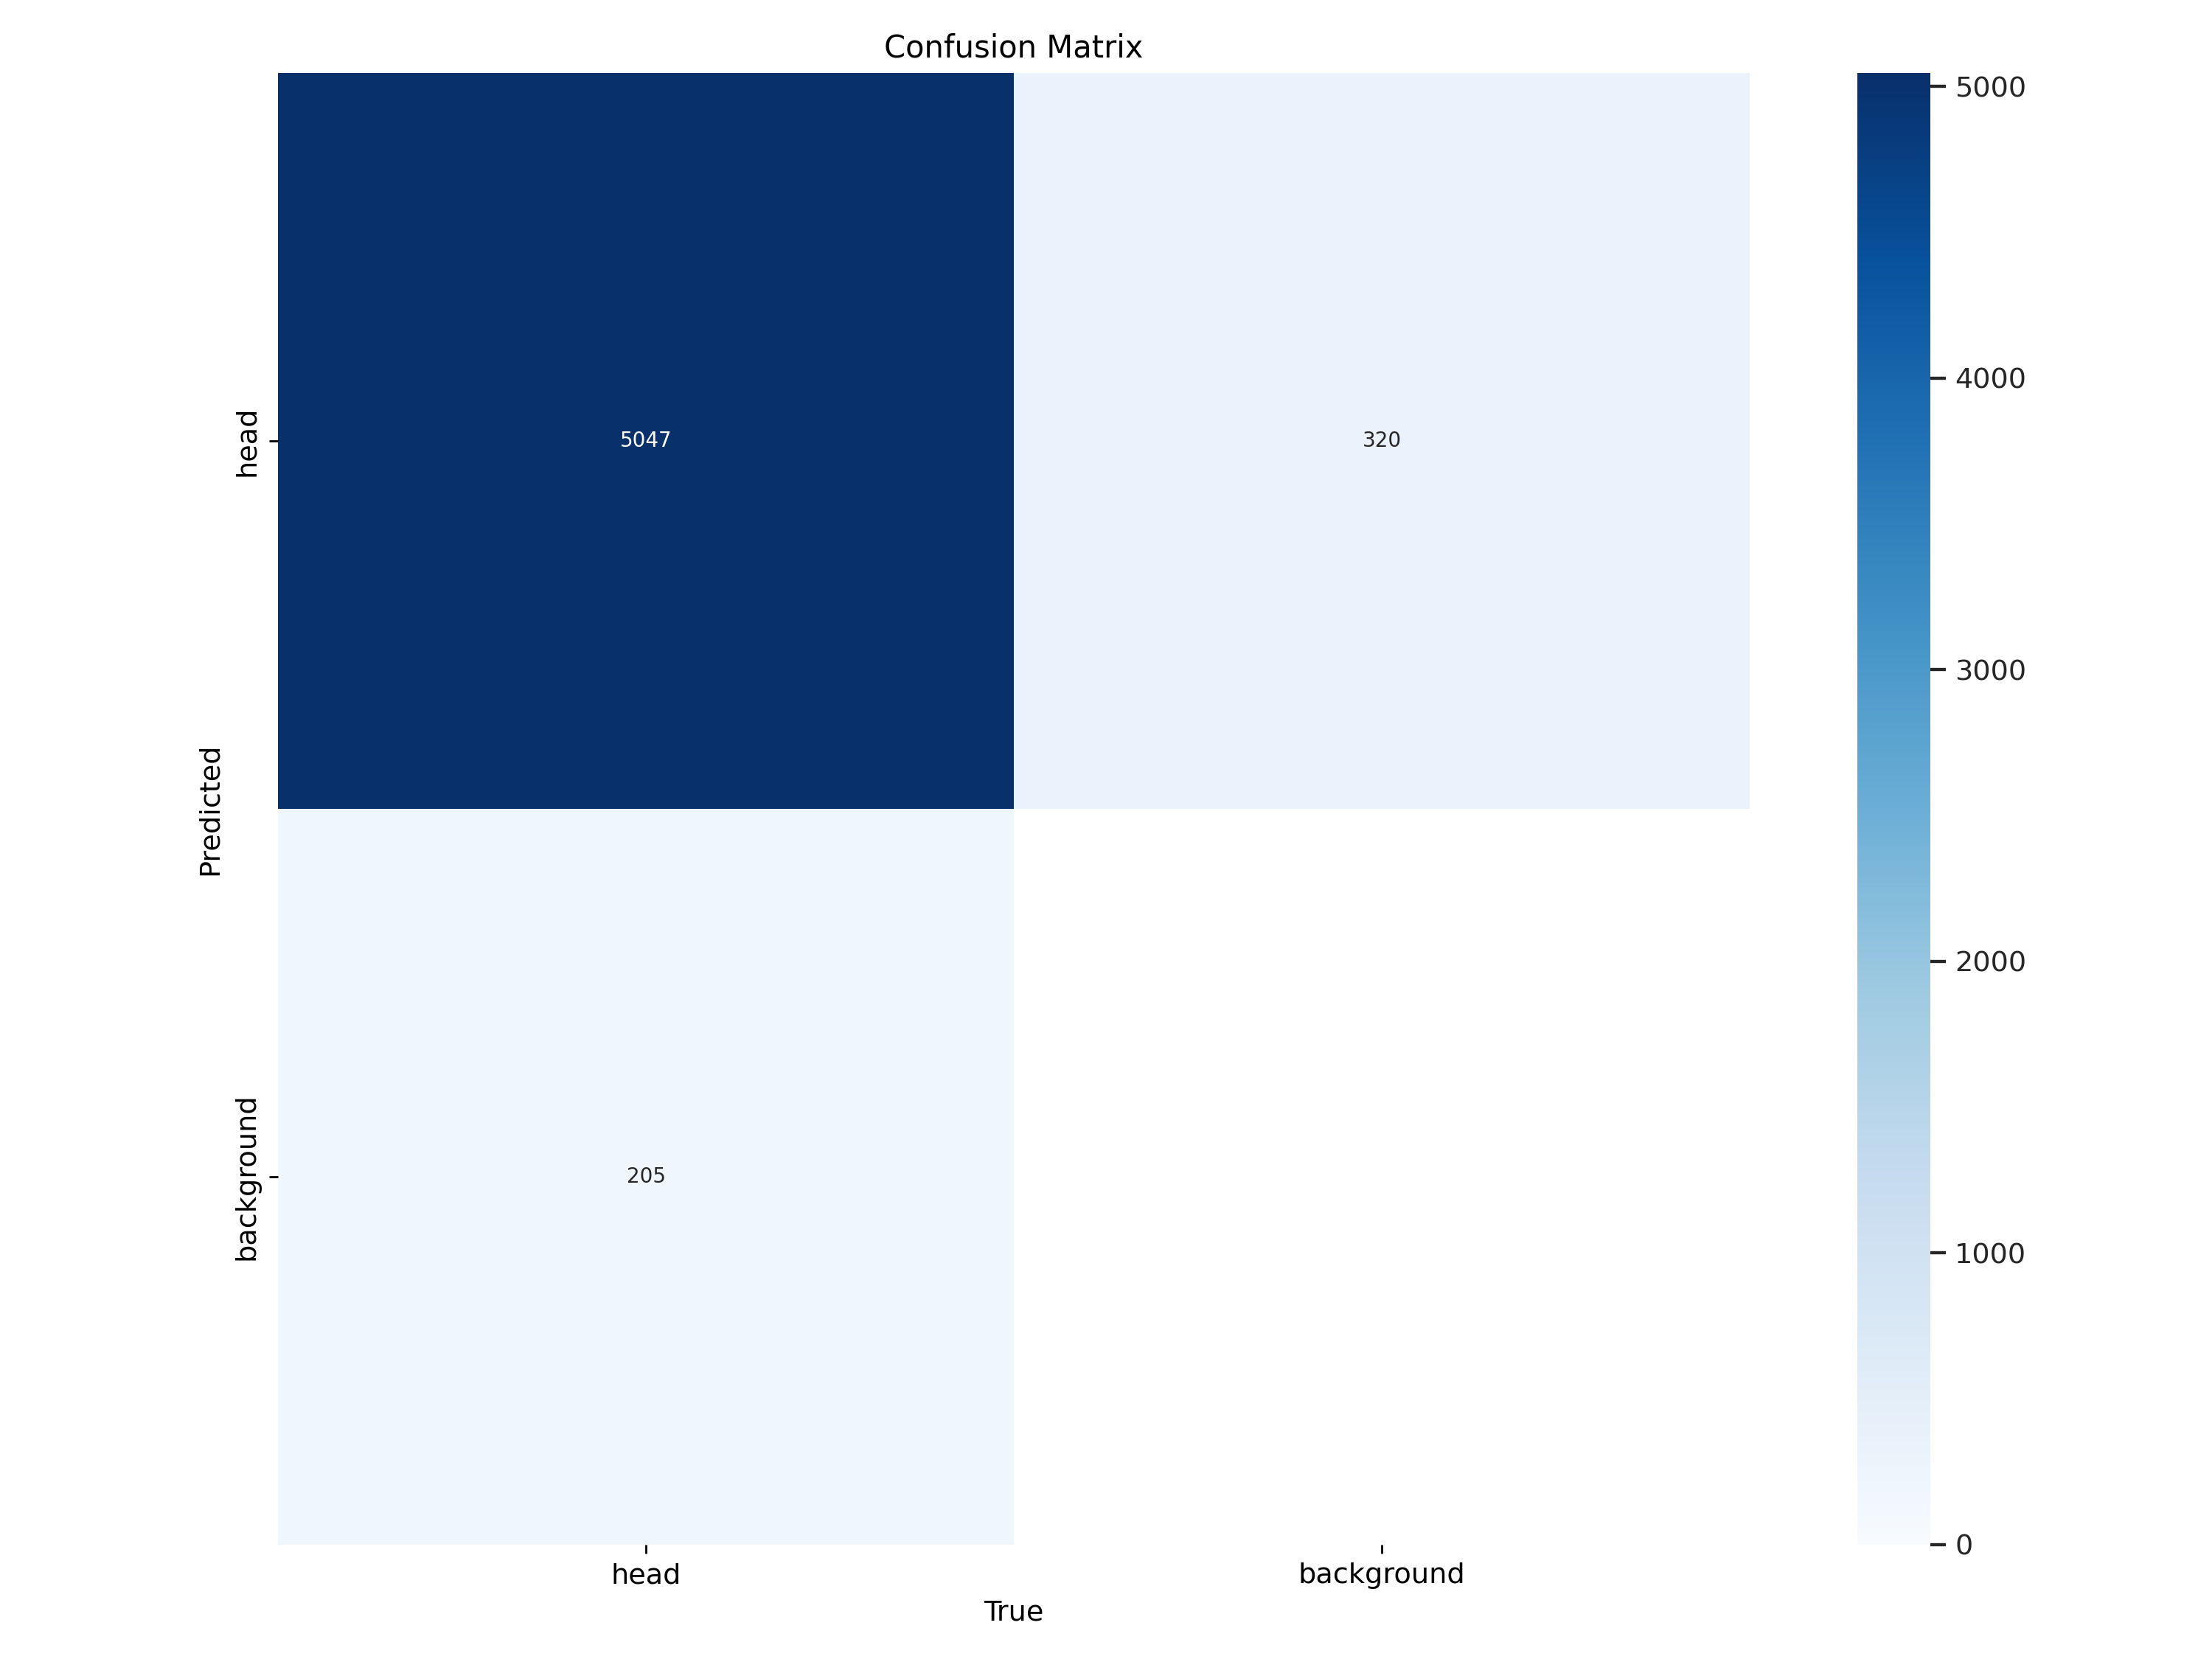

In [11]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width=600)

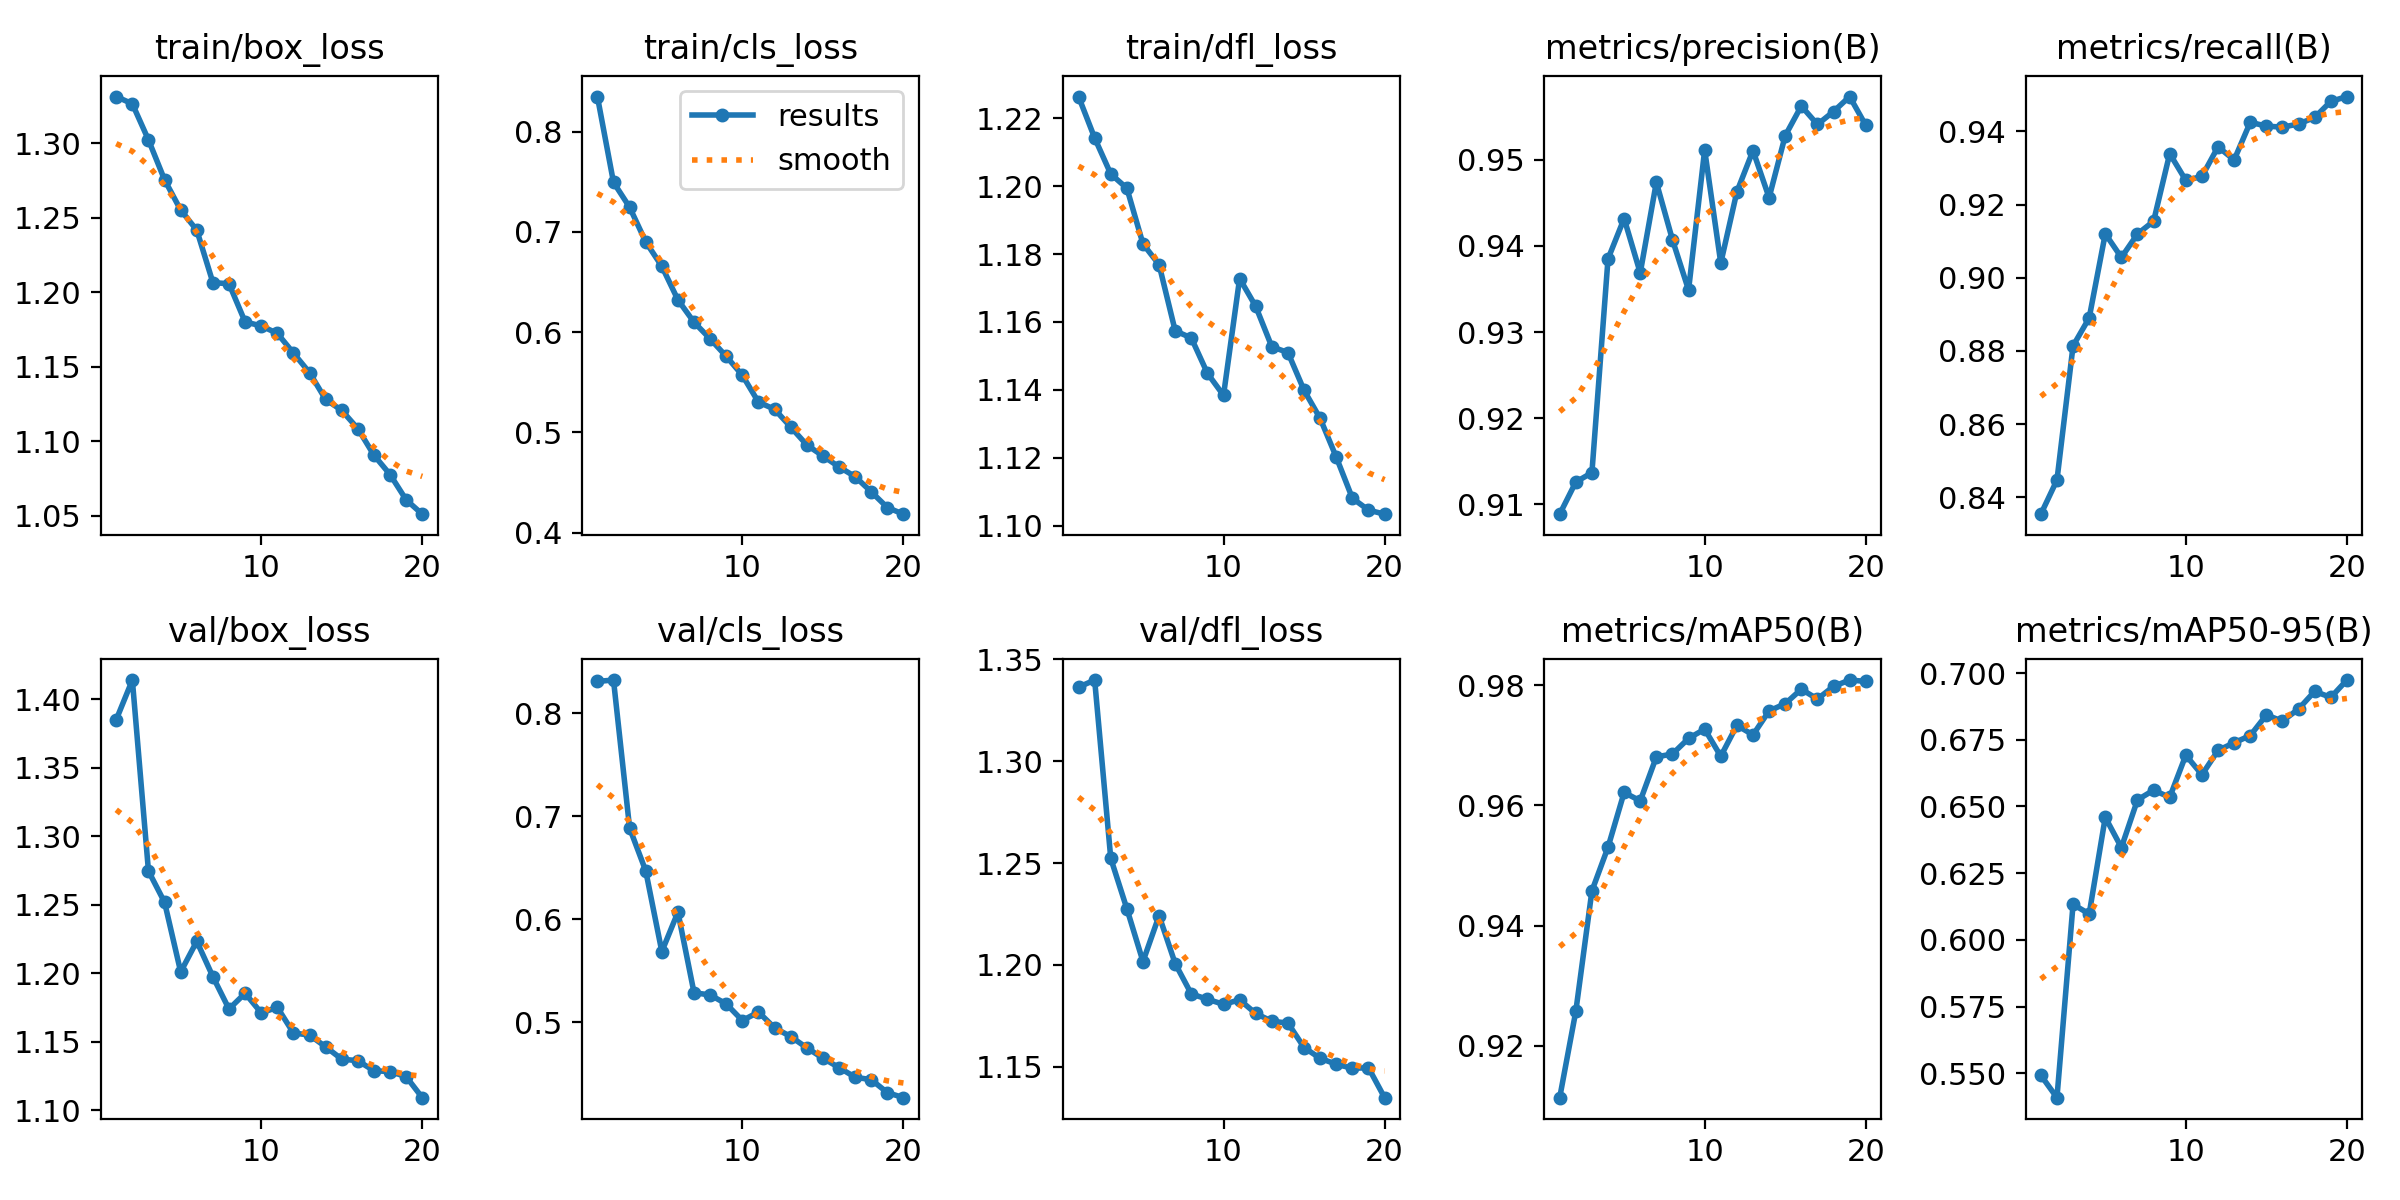

In [12]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

In [13]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Hard-Hat-Workers-14/Hard-Hat-Workers-14/valid/labels.cache... 1413 images, 0 backgrounds, 0 corrupt: 100% 1413/1413 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 89/89 [00:29<00:00,  2.99it/s]
                   all       1413       5252      0.953      0.949      0.981      0.698
Speed: 0.3ms preprocess, 13.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 data={dataset.location}/test/images

WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 heads, 112.5ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 heads, 109.5ms
Speed: 4.1ms preprocess, 111.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


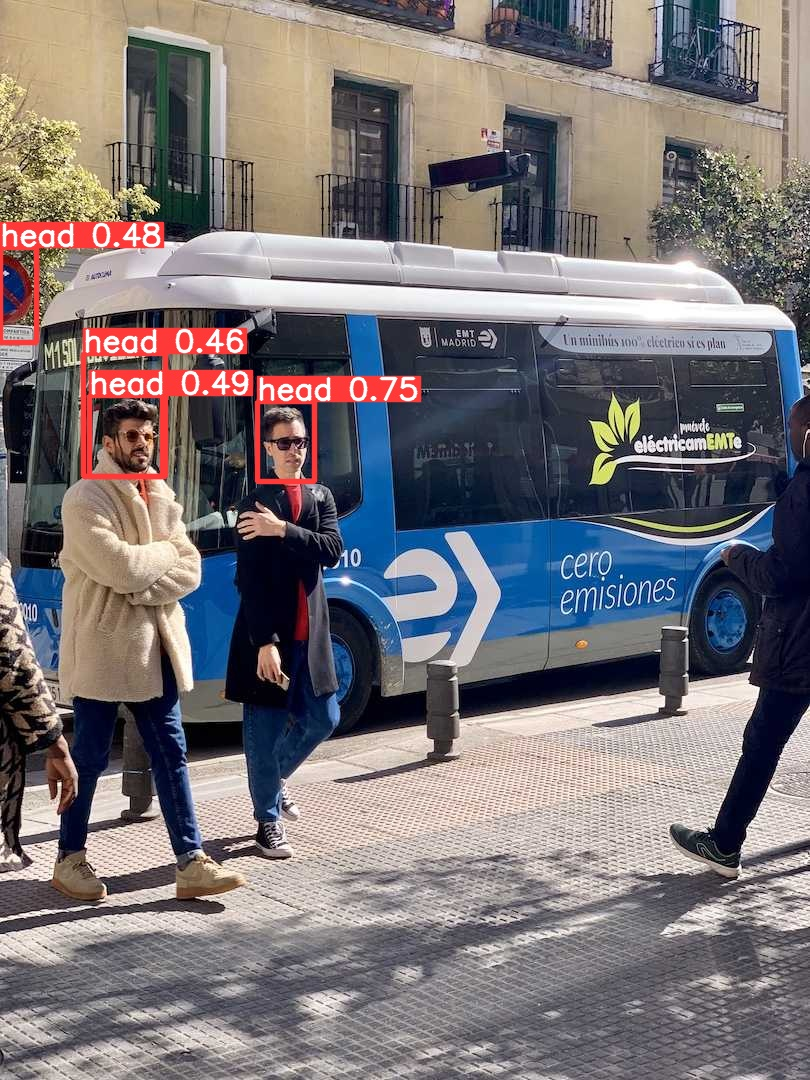

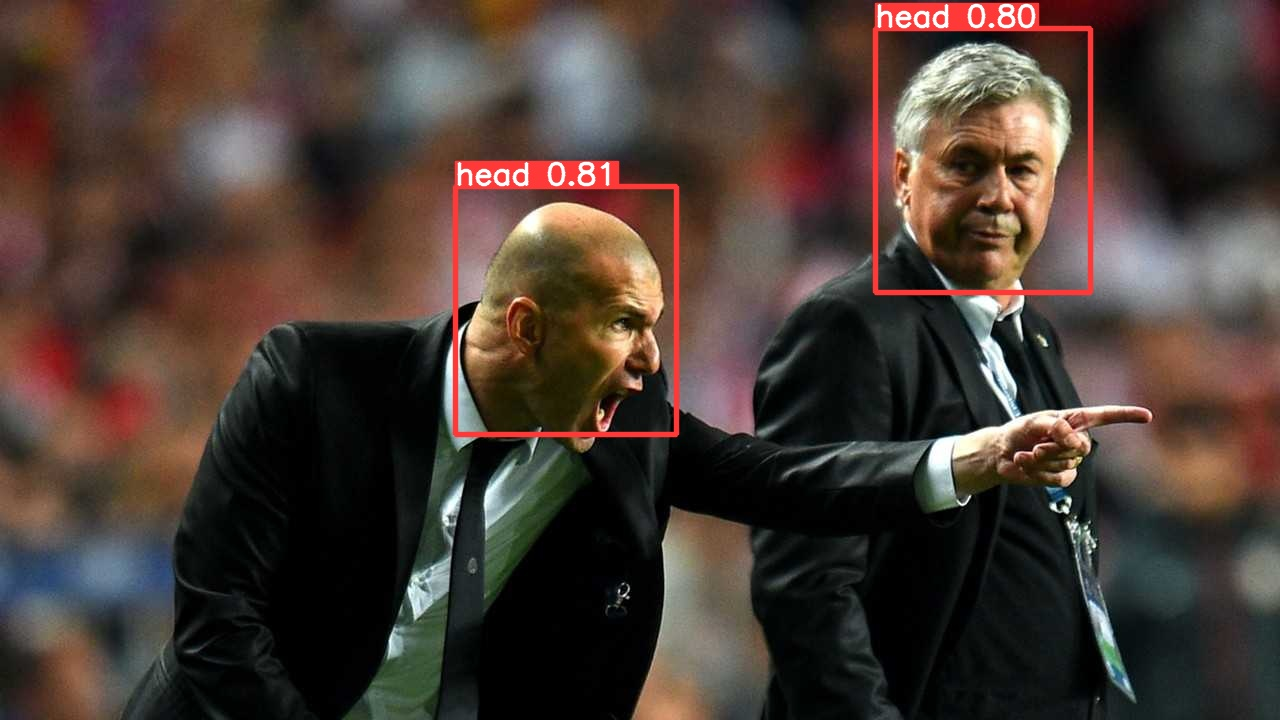

In [15]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:3]:
  display(Image(filename=image_path, height=600))
  print("\n")